<a href="https://colab.research.google.com/github/aglie/iucr2020_compschool/blob/main/arkadiy_eigenvalues_101/Exercise_4_eigenvalue_repulsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
from scipy.linalg import block_diag

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [ ]:
# we will draw the molecule again
figsize(6,6)
def plot_atoms_and_forces(x, y, forces = None, ax = None):
  """Draw molecule as points and lines, and forces"""
  if not ax:
    ax = gca()

  ax.plot(x, 0*y, color=ones(3)*0.9, zorder=0) #gray baseline 
  ax.plot(x, y, '.-', markersize=20, color='black', zorder=2 )
  ax.axis('off')
  ax.axis([-0.5, 4.5, -2, 2])

  if forces is not None:
    ax.quiver(x, y, forces*0, forces, color='orange', scale = 10, zorder=1)

# Setup

In [ ]:
# In this exercise we will take a look how eigenvalues and eigenfunctions change
# with the change of matrices

#let's start with a molecule of six atoms
N=6

#make a tridiagonal dynamic matrix
D = diagflat(ones(N-1),1) + diagflat(ones(N-1), -1) 
D = D-diag(sum(D,axis=0))
# show the matrix
D

array([[-1.,  1.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  1., -1.]])

In [ ]:
lam, vec = eig(-D) #calculate normal modes

#sort normal modes in ascending order
vec = vec[:,argsort(lam)]
lam = sort(lam)
lam


array([-2.38733627e-17,  2.67949192e-01,  1.00000000e+00,  2.00000000e+00,
        3.00000000e+00,  3.73205081e+00])

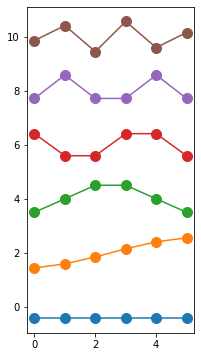

In [ ]:
figsize(3,6)
_ = plot(vec + 2*arange(N), '.-', markersize = 20)

# Changing particular eigenvalue

Now, assume we want to change a frequency of a particular normal mode, say a normal mode with the index 1 (orange) which looks like a rotation of molecule around the central atom. In order to do it, we need to modify our matrix $D$ with a pertrubation $P$, such that $\lambda_1 \approx h_1^T(D+P)h_1$ would increase. This can be done with a matrix $P$ generated as an outer product $P=v v^T$:

In [ ]:
# Vibration taht we want to improve has a displacement which is roughly linear along the line
v = linspace(-1,1,6)*1.3

P = outer(v,v) #create the pertrubation matrix

#Check that it has worked


lam2, vec2 = eig(-D + P) #calculate normal modes

#sort normal modes in ascending order
vec2 = vec2[:,argsort(lam2)]
lam2 = sort(lam2)
lam2

array([0.        , 1.        , 1.97417323, 3.        , 3.72749216,
       5.0303346 ])

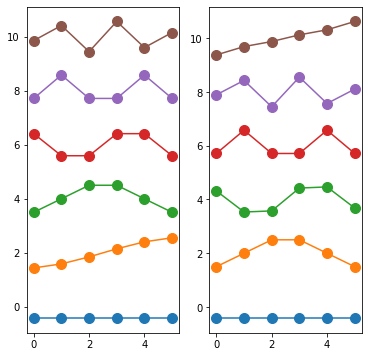

In [ ]:
#And check that it has worked
_,ax = subplots(1,2,figsize=(6,6))

ax[0].plot(vec + 2*arange(N), '.-', markersize = 20)
_=ax[1].plot(vec2 + 2*arange(N), '.-', markersize = 20)
  

As you see on the image everything has worked, and we have succussfully increased the eigenvalue of the vector $h_1$ from $\lambda_1 = 0.27$ to $17.8$ which has now made it the largest eigenvalue $\lambda_5$.

An interesting thing to look how this change has happened, for instance as you slowly increase the value of perturbation $A \rightarrow A+xP$ for $x$ slowly growing from $0$ to $1$. 

Make a plot which should look something like:


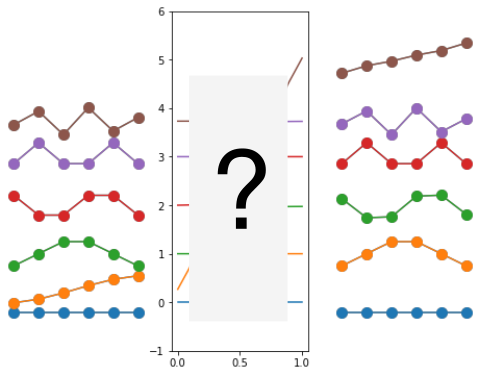



# Task 1
Calculate evolution of eigenvalues, do you notice anything strange in the places where eigenvalues should cross?

Explore how eigenvectors change on approaching anticrossing.

## Solution

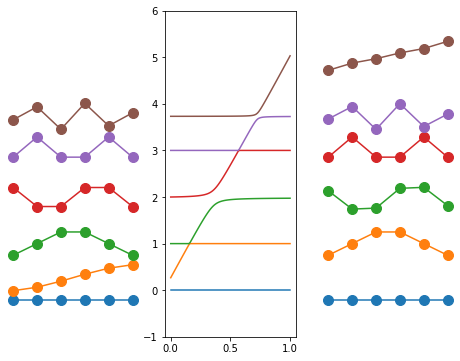

In [ ]:
# Calculate evolution of eigenvectors
evolution_of_eigenvalues = []
mix_params = linspace(0,1,100)
for mix in mix_params:
  eigenvalues = sort(eig(-D+P*mix)[0])
  evolution_of_eigenvalues.append(eigenvalues)

# Plot it
# in principle something like this would work:
# plot(mix_params, evolution_of_eigenvalues)

# but here is a plot also showing eigenvectors
_ , ax = subplots(1,3,figsize=(8,6))
ax[0].plot(vec/2 + lam, '.-', markersize = 20)
ax[1].plot(mix_params, evolution_of_eigenvalues)
ax[2].plot(vec2/2 + lam2, '.-', markersize = 20)
for i in range(3):
  ax[i].set_ylim([-1,6])
for i in [0,2]:
  ax[i].axis('off')

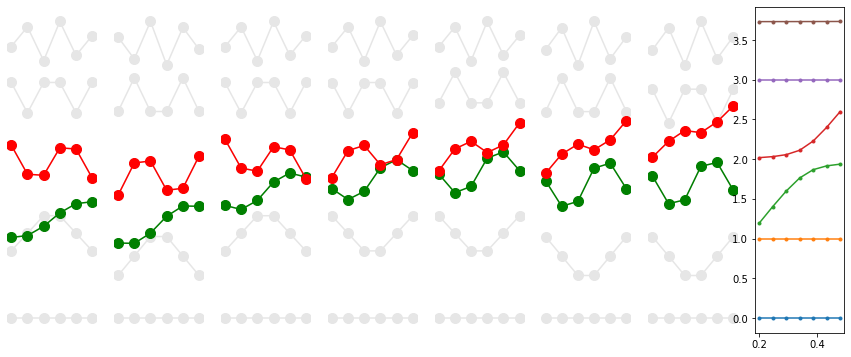

In [ ]:
def sorted_eig(A):
  lam, vec = eig(A)
  seq = argsort(lam)
  return lam[seq], vec[:,seq]

_ , ax = subplots(1,8,figsize=(15,6))

# Calculate evolution of eigenvectors
evolution_of_eigenvalues_short = []
mix_params = linspace(0.2,0.48,7)
for i,mix in enumerate(mix_params):
  lam_t, vec_t = sorted_eig(-D + mix*P)
  evolution_of_eigenvalues.append(eigenvalues)
  
  ax[i].plot(vec_t/2 + lam_t, '.-', markersize = 20, color=ones(3)*0.9)
  ax[i].plot(vec_t[:,2]/2 + lam_t[2], '.-', markersize = 20, color='green')
  ax[i].plot(vec_t[:,3]/2 + lam_t[3], '.-', markersize = 20, color='red')
  
  ax[i].axis('off')
  evolution_of_eigenvalues_short.append(lam_t)

_=ax[-1].plot(mix_params, evolution_of_eigenvalues_short, '.-')


# Task 2

Notice that there is no avoided crossing with eigenvalues 2 and 4 (green and lavender), why is that? Is related to the symmetry of those normal modes?

# Task 3

Observed behaviour is very common and it is known under the name of "eigenvalue repulstion" in the context of eigenvalue calculations and as "avoided crossing" in the [phonon](http://henriquemiranda.github.io/phononwebsite/phonon.html?yaml=http://henriquemiranda.github.io/phononwebsite/tests/phonopy/band.yaml) and electron dispersion curves.

To prove that it is common, calculate evolution of the eigenvalues of $A+xB$ for random symmetric matrices $A$ and $B$.

## Solution

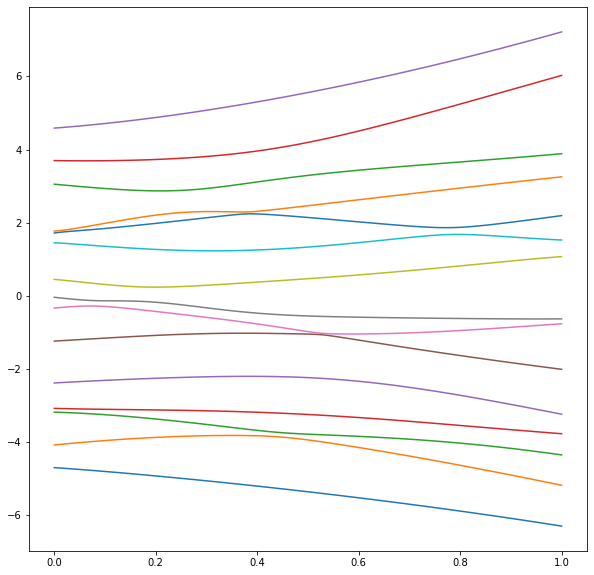

In [ ]:
figsize(7,7)
def random_symmetric(N):
  A = random.normal(size=(N,N))
  return (A + A.T)/2

figsize(10,10)

N=15
A = random_symmetric(N)
B = random_symmetric(N)

res = []
mix_params = linspace(0,1,100)
for mix in mix_params:
    res.append(sort(eig(A+mix*B)[0]))

_=plot(mix_params, array(res))